<a href="https://colab.research.google.com/github/Tanveer132/Classfication-Types-in-Machine-Learning/blob/main/FST_Practice_SVM(diabetes%2Coversampling%2CHyperTuning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Perform support vector machine classification

data - diabetes data

model - SVC()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.svm import SVC

In [2]:
df=pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


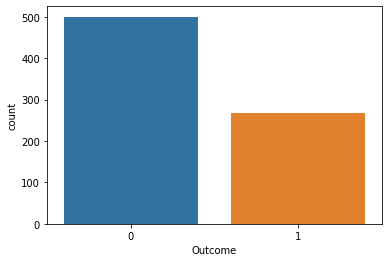

In [5]:
sns.countplot(df['Outcome'],data=df)

In [6]:
x=df.drop(columns='Outcome')
y=df['Outcome']

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [7]:
#model 
model = SVC()
model.fit(xtrain,ytrain)

ypred=model.predict(xtest)

Accuracy : 0.7922077922077922
Report :               precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.73      0.51      0.60        47

    accuracy                           0.79       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154



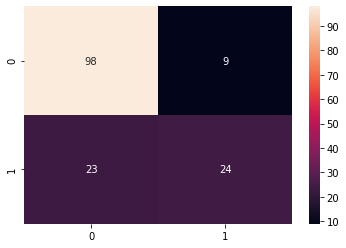

In [8]:
#Accuracy
acc=accuracy_score(ytest,ypred)
report=classification_report(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
print("Accuracy :",acc)
print("Report :",report)
sns.heatmap(cm,annot=True)

**Conclusion :** we got the accuracy of 0.7922077922077922

#Create oversampled data and perform SVM 


In [9]:
#Select data for each label
yes=df[df['Outcome']==1].index
no=df[df['Outcome']==0].index

#We will increase "yes" data equal to "no"
random_index=np.array(np.random.choice(yes,len(no)))
new_index=np.concatenate([no,random_index])
data=df.iloc[new_index,:]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


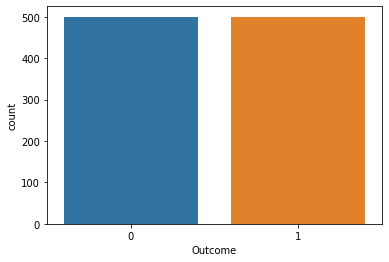

In [10]:
sns.countplot(data['Outcome'],data=data)

**Conclusion :** Now we have same amount of data for both labels

In [11]:
x=data.drop(columns='Outcome')
y=data['Outcome']

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
#model 
model = SVC()
model.fit(xtrain,ytrain)

ypred=model.predict(xtest)



Accuracy : 0.685
Report :               precision    recall  f1-score   support

           0       0.65      0.76      0.70        98
           1       0.72      0.62      0.67       102

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.68       200
weighted avg       0.69      0.69      0.68       200



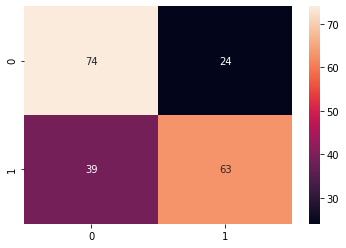

In [13]:
#Accuracy
acc=accuracy_score(ytest,ypred)
report=classification_report(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
print("Accuracy :",acc)
print("Report :",report)
sns.heatmap(cm,annot=True)

**Conclusion :** We can observe increased accuracy for class 1 label

#Tuning Hyperparameters



In [14]:
# help(SVC)

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold


Parameters :

     |  C : float, optional (default=1.0)
     |      Regularization parameter. The strength of the regularization
     is
     |      inversely proportional to C. Must be strictly positive
     The     penalty
     |      is a squared l2 penalty.
     |  
     |  kernel : string, optional (default='rbf')
     |      Specifies the kernel type to be used in the algorithm.
     |      It must be one of 'linear', 'poly', 'rbf', 'sigmoid',  
     'precomputed' or
     |      a callable.
     |      If none is given, 'rbf' will be used. If a callable is given
     it     is
     |      used to pre-compute the kernel matrix from data matrices;
     that    matrix
     |      should be an array of shape ``(n_samples, n_samples)``.
     |  
     |  degree : int, optional (default=3)
     |      Degree of the polynomial kernel function ('poly').
     |      Ignored by all other kernels.
     |  
     |  gamma : {'scale', 'auto'} or float, optional (default='scale')
     |      Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.

In [15]:
#estimators
model=SVC()

#params
params={"C":[100,50,10,1,0.1,0.01],
        "kernel":['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
        "gamma":['scale']}

#cross validator
kfold=RepeatedStratifiedKFold(n_splits=5, n_repeats=10,random_state=1)

In [16]:
# grid_cv=GridSearchCV(estimator=model,param_grid=params,cv=kfold,scoring='accuracy')
# result=grid_cv.fit(xtrain,ytrain)


In [17]:
# print(result.best_score_)
# print(result.best_params_)

In [18]:
#model 
model = SVC(kernel='rbf',C=10,gamma='scale')
model.fit(xtrain,ytrain)

ypred=model.predict(xtest)

Accuracy : 0.71
Report :               precision    recall  f1-score   support

           0       0.69      0.76      0.72        98
           1       0.74      0.67      0.70       102

    accuracy                           0.71       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.71      0.71      0.71       200



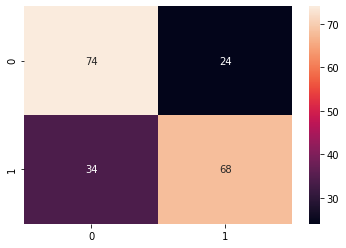

In [19]:
#Accuracy
acc=accuracy_score(ytest,ypred)
report=classification_report(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
print("Accuracy :",acc)
print("Report :",report)
sns.heatmap(cm,annot=True)